# E-Commerce Data Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv('E-com_Data.csv')

In [3]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [5]:
df.shape

(541116, 12)

In [6]:
df.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [7]:
df.count()

CustomerID           404189
Item Code            537979
InvoieNo             537979
Date of purchase     537979
Quantity             537979
Time                 537979
price per Unit       537979
Price                537979
Shipping Location    537979
Cancelled_status       8345
Reason of return          3
Sold as set               0
dtype: int64

In [8]:
df.isnull().sum()

CustomerID           136927
Item Code              3137
InvoieNo               3137
Date of purchase       3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

In [9]:
df.duplicated().sum()

3145

In [10]:
df['Date of purchase']=pd.to_datetime(df['Date of purchase'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  float64       
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  float64       
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    object        
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 49.5+ MB


In [12]:
print("Min Date:", df['Date of purchase'].min())
print()
print("Max Date:", df['Date of purchase'].max())

Min Date: 2016-12-02 00:00:00

Max Date: 2017-12-19 00:00:00


In [13]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [14]:
df.duplicated().sum()

3145

In [15]:
df=df.drop_duplicates(ignore_index=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df1=df[['CustomerID','InvoieNo','Date of purchase','Price']]
df1=df1.rename(columns={'InvoieNo':'InvoiceNo','Date of purchase':'Date'})

In [18]:
df1.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [19]:
df1.isnull().sum()

CustomerID    133790
InvoiceNo          1
Date               1
Price              1
dtype: int64

In [20]:
df1.isnull().sum()/len(df1)*100

CustomerID    24.869370
InvoiceNo      0.000186
Date           0.000186
Price          0.000186
dtype: float64

### Data Cleaning

In [21]:
df1.shape

(537971, 4)

In [22]:
df1=df1[~(df1.CustomerID.isnull())]
df1=df1[~(df1.Price<0)]

In [23]:
df1.shape

(395998, 4)

In [24]:
df1.describe()

,CustomerID,InvoiceNo,Date,Price
count,395998.000000,395998.000000,395998,395998.000000
mean,2186.423482,385683.406209,2017-07-15 22:41:19.830705920,2554.930656
min,2.000000,361429.000000,2016-12-02 00:00:00,12.000000
25%,1212.000000,374298.000000,2017-04-12 00:00:00,598.000000
50%,2080.000000,386957.000000,2017-08-05 00:00:00,1608.000000
75%,3294.000000,397157.000000,2017-10-26 00:00:00,2520.000000
max,4372.000000,406651.000000,2017-12-19 00:00:00,90400.000000
std,1252.325963,13107.505659,NaN,4903.426736


In [25]:
df1.isnull().sum()

CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64

### Data Understanding

In [26]:
import datetime

In [27]:
new_date=datetime.datetime(2017,12,20)

In [28]:
new_date

datetime.datetime(2017, 12, 20, 0, 0)

### Building RFM Approach

In [29]:
RFMApproach=df1.groupby('CustomerID').agg({'Date':lambda x:(new_date-x.max()).days, 'InvoiceNo':lambda x:x.count(), 'Price':lambda x:x.sum()})

In [30]:
RFMApproach

,Date,InvoiceNo,Price
CustomerID,,,
2.0,4,182,553704.0
3.0,77,27,257404.0
4.0,19,72,176613.0
5.0,311,16,41976.0
6.0,37,77,166972.0
...,...,...,...
4368.0,278,10,20480.0
4369.0,181,7,10774.0
4370.0,9,12,25177.0


In [31]:
RFMApproach.rename(columns={'Date':'Recency','InvoiceNo':'Frequency','Price':'Monetory'},inplace=True)

In [32]:
RFMApproach

,Recency,Frequency,Monetory
CustomerID,,,
2.0,4,182,553704.0
3.0,77,27,257404.0
4.0,19,72,176613.0
5.0,311,16,41976.0
6.0,37,77,166972.0
...,...,...,...
4368.0,278,10,20480.0
4369.0,181,7,10774.0
4370.0,9,12,25177.0


In [33]:
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,77,166972.0
...,...,...,...,...
4319,4368.0,278,10,20480.0
4320,4369.0,181,7,10774.0
4321,4370.0,9,12,25177.0
4322,4371.0,4,754,280608.0


In [34]:
RFMApproach.describe()

,Recency,Frequency,Monetory
count,4324.000000,4324.000000,4.324000e+03
mean,93.755319,91.581406,2.339841e+05
std,100.115549,228.617397,8.636663e+05
min,1.000000,1.000000,3.880000e+02
25%,19.000000,17.000000,3.928800e+04
50%,52.000000,41.000000,8.614700e+04
75%,143.250000,100.000000,2.108338e+05
max,381.000000,7837.000000,3.553619e+07


In [35]:
quantiles=RFMApproach.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 19.0, 0.5: 52.0, 0.75: 143.25},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetory': {0.25: 39288.0, 0.5: 86147.0, 0.75: 210833.75}}

In [36]:
def rec_value(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.5]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4

In [37]:
def freq_mont_value(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [38]:
RFMApproach.columns

Index(['Recency', 'Frequency', 'Monetory'], dtype='object')

In [39]:
RFMApproach['R']=RFMApproach['Recency'].apply(rec_value,args=('Recency',quantiles))

In [40]:
RFMApproach['F']=RFMApproach['Frequency'].apply(freq_mont_value,args=('Frequency',quantiles))
RFMApproach['M']=RFMApproach['Monetory'].apply(freq_mont_value,args=('Monetory',quantiles))

In [41]:
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,1,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,77,166972.0,2,2,2
...,...,...,...,...,...,...,...
4319,4368.0,278,10,20480.0,4,4,4
4320,4369.0,181,7,10774.0,4,4,4
4321,4370.0,9,12,25177.0,1,4,4
4322,4371.0,4,754,280608.0,1,1,1


In [42]:
RFMApproach['RFM']=RFMApproach[['R','F','M']].sum(axis=1)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM
0,2.0,4,182,553704.0,1,1,1,3
1,3.0,77,27,257404.0,3,3,1,7
2,4.0,19,72,176613.0,1,2,2,5
3,5.0,311,16,41976.0,4,4,3,11
4,6.0,37,77,166972.0,2,2,2,6
...,...,...,...,...,...,...,...,...
4319,4368.0,278,10,20480.0,4,4,4,12
4320,4369.0,181,7,10774.0,4,4,4,12
4321,4370.0,9,12,25177.0,1,4,4,9
4322,4371.0,4,754,280608.0,1,1,1,3


In [44]:
RFMApproach.nunique()

Recency       354
Frequency     463
Monetory     4283
R               4
F               4
M               4
RFM            10
dtype: int64

In [45]:
Loyalty_level=['Platinum','Gold','Silver','Bronze']
score_cuts=pd.qcut(RFMApproach.RFM,q=4,labels=Loyalty_level)
RFMApproach['Loyalty_level']=score_cuts.values
RFMApproach=RFMApproach.reset_index()

In [46]:
RFMApproach

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,Loyalty_level
0,2.0,4,182,553704.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,3,3,1,7,Gold
2,4.0,19,72,176613.0,1,2,2,5,Platinum
3,5.0,311,16,41976.0,4,4,3,11,Bronze
4,6.0,37,77,166972.0,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...,...
4319,4368.0,278,10,20480.0,4,4,4,12,Bronze
4320,4369.0,181,7,10774.0,4,4,4,12,Bronze
4321,4370.0,9,12,25177.0,1,4,4,9,Silver
4322,4371.0,4,754,280608.0,1,1,1,3,Platinum


In [47]:
RFMApproach.to_csv('seg_customer_det.csv')
RFMApproach['Loyalty_level'].value_counts()

Loyalty_level
Gold        1298
Platinum    1274
Silver       980
Bronze       772
Name: count, dtype: int64

### Visualization

In [48]:
final_report=RFMApproach.groupby('Loyalty_level')[['Recency','Frequency','Monetory','CustomerID']].agg({'Recency':'sum','Frequency':'sum','Monetory':'sum','CustomerID':'nunique'}).reset_index()

In [49]:
final_report

,Loyalty_level,Recency,Frequency,Monetory,CustomerID
0,Platinum,26807,289408,771518839.0,1274
1,Gold,84831,74310,168474168.0,1298
2,Silver,124521,23894,52331162.1,980
3,Bronze,169239,8386,19423261.0,772


In [50]:
final_report=final_report.rename(columns={'CustomerID':'NumBuyers'})
final_report['Percent']=round(final_report['NumBuyers']/final_report.NumBuyers.sum()*100,2)
final_report

,Loyalty_level,Recency,Frequency,Monetory,NumBuyers,Percent
0,Platinum,26807,289408,771518839.0,1274,29.46
1,Gold,84831,74310,168474168.0,1298,30.02
2,Silver,124521,23894,52331162.1,980,22.66
3,Bronze,169239,8386,19423261.0,772,17.85


In [51]:
final_report1=final_report[['Loyalty_level','NumBuyers','Percent']]
final_report1

,Loyalty_level,NumBuyers,Percent
0,Platinum,1274,29.46
1,Gold,1298,30.02
2,Silver,980,22.66
3,Bronze,772,17.85


In [54]:
!pip install squarify
import squarify

DEPRECATION: Loading egg at c:\users\admin\anaconda3\lib\site-packages\sensor-1.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


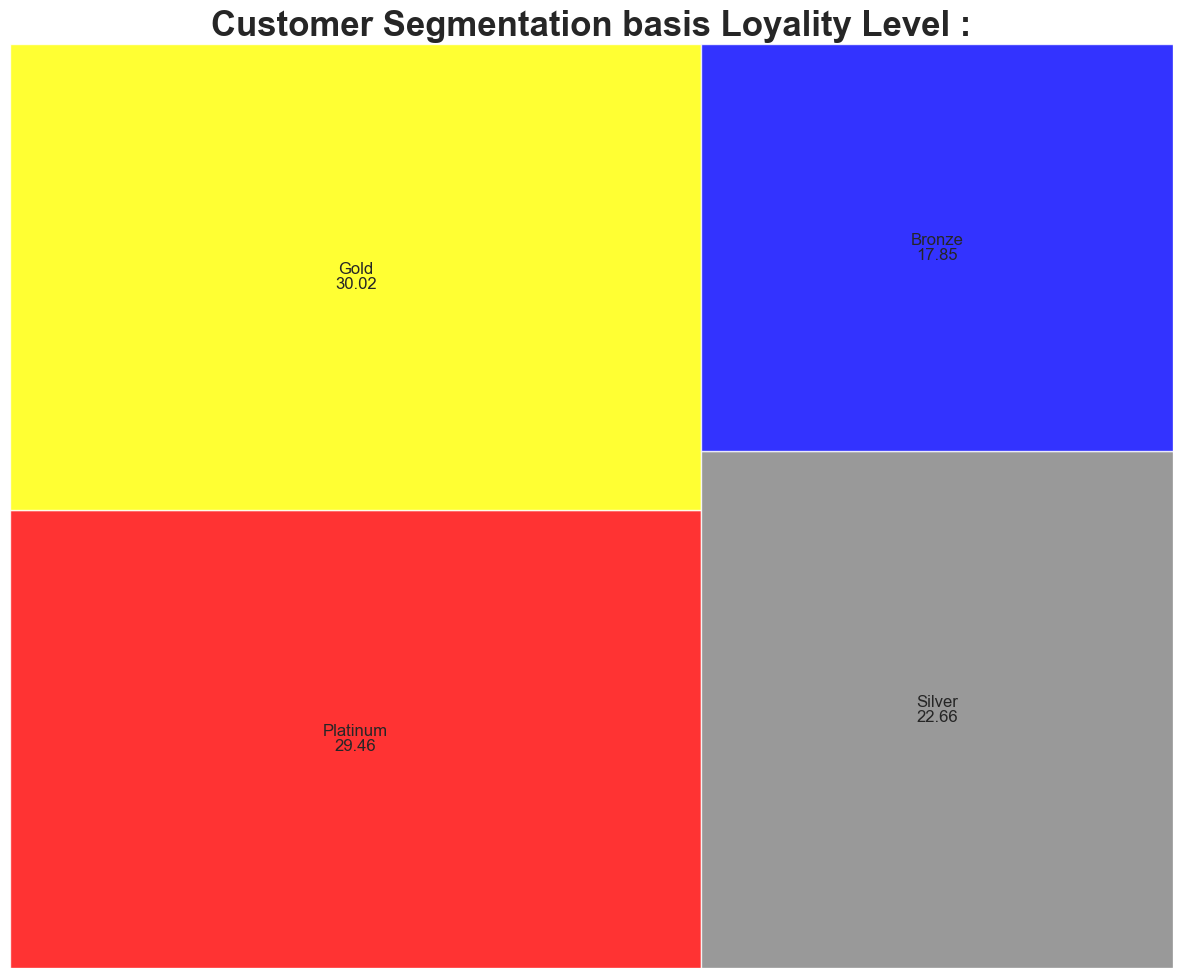

In [55]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15,12)
colors_dics = {'Platinum':'red','Gold':'yellow', 'Silver':'gray','Bronze':'blue'}

#squarify.plot(sizes = final_report1['NumBuyers'], color = colors_dics.values(),label = ['{} \n{0.0f} customers \n{}%'.format(*final_report1.iloc[i]) for i in range(0, len(final_report1))], alpha=0.6)

squarify.plot(sizes=final_report1['NumBuyers'],color = colors_dics.values(), label = ['Platinum','Gold','Silver','Bronze'], alpha=0.8,
             value=final_report1['Percent'])
plt.title("Customer Segmentation basis Loyality Level :", fontsize=25, fontweight='bold')
plt.axis('off')
plt.show()